## Data Credits: MovieLens 100K Dataset
## URL: https://grouplens.org/datasets/movielens/100k/

### We are going to build a small recommendation engine which will help us to select a movie to watch

In [1]:
# import necessary libraries
import pandas as pd
%matplotlib inline

### After downloading the dataset, read through the README, there are three files that we are going to make use of. They are u.data, u.item, u.user, let's read each file

In [2]:
# u.data is tab delimited and passing the column names from README
df = pd.read_csv("u.data", sep="\t", names=['user_id', 'item_id', 'rating', 'timestamp'])
df.head(5)

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


### We will not conside the timestamp column, so let's go ahead and deselect it

In [3]:
df = df[['user_id', 'item_id', 'rating']]
df.head(5)

,user_id,item_id,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


#### user_id is related with u.user file
#### item_id is related with u.item file
#### let's read the next set of files

In [4]:
# u.data is | delimited and passing the column names from README
movie_df = pd.read_csv('u.item', sep='|', names=['movie_id', 'movie_title', 'release_date', 'video_release_date', 'IMDb_URL', 
                                                  'unknown', 'Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime',
                                                  'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
                                                  'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'])
movie_df.head(5)

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


#### Genres are binary one hot code in columns (last 19 columns), for ease of use lets get them to one column, but do store the binary one hot code frame in another dataframe for later use

In [5]:
films_db = movie_df
# capture all genre columns, get them to one column, remove them after it is done
genres = ['unknown', 'Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime',
          'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
          'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

movie_df['genre'] = movie_df[genres].idxmax(1)
movie_df = movie_df.drop(genres, axis=1)
movie_df.head(5)

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,genre
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,Animation
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,Action
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,Thriller
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,Action
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),Crime


#### we will select only the necessary columns here too, think we can just drop the video_release_date column alone

In [6]:
movie_df = movie_df[['movie_id', 'movie_title', 'release_date', 'IMDb_URL', 'genre']]

#### some preprocessing needs to be done in the release_date column, since we just want the year of release so we can use it to distinguish 80's 0r 90's

In [7]:
movie_df['release_year'] = pd.to_datetime(movie_df['release_date'])
movie_df['release_year'] = movie_df['release_year'].dt.year
movie_df = movie_df[['movie_id', 'movie_title', 'release_year', 'IMDb_URL', 'genre']]
movie_df.head(5)

,movie_id,movie_title,release_year,IMDb_URL,genre
0,1,Toy Story (1995),1995.0,http://us.imdb.com/M/title-exact?Toy%20Story%2...,Animation
1,2,GoldenEye (1995),1995.0,http://us.imdb.com/M/title-exact?GoldenEye%20(...,Action
2,3,Four Rooms (1995),1995.0,http://us.imdb.com/M/title-exact?Four%20Rooms%...,Thriller
3,4,Get Shorty (1995),1995.0,http://us.imdb.com/M/title-exact?Get%20Shorty%...,Action
4,5,Copycat (1995),1995.0,http://us.imdb.com/M/title-exact?Copycat%20(1995),Crime


In [8]:
print len(movie_df) # 1682 movies
print int(movie_df['release_year'].min()),  int(movie_df['release_year'].max()) # 76 years

1682
1922 1998


#### No. of Movie Reviews in each year

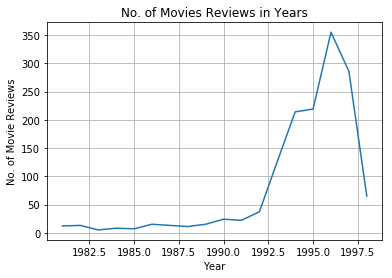

In [9]:
mvies_grp = movie_df.groupby(['release_year'], as_index=False).agg({'movie_id': 'count'})
# putting a filter, since before 1980 very less reviews
mvies_grp = mvies_grp[mvies_grp['release_year'] > 1980]

from pylab import *
plot(list(mvies_grp['release_year']), list(mvies_grp['movie_id']))
xlabel('Year')
ylabel('No. of Movie Reviews')
title('No. of Movies Reviews in Years')
grid(True)
show()

#### now the user info file

In [10]:
user_df = pd.read_csv("u.user", sep="|", names=['user_id', 'age', 'gender', 'occupation', 'zip code'])
user_df.head(5)

,user_id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


#### select only necessary columns

In [11]:
user_df = user_df[['user_id', 'age', 'gender', 'occupation']]

#### Now to see which movie has most number of reviews by count, so by that it means more people have watched it

In [12]:
# popular movies by count of reviews
grp_movies = df.groupby(['item_id'], as_index=False)
pop_mvies = grp_movies.agg({"rating": 'count'})
pop_five = pop_mvies.sort_values("rating", ascending=False).head(5)
pop_five

,item_id,rating
49,50,583
257,258,509
99,100,508
180,181,507
293,294,485


In [13]:
# use pandas merge to get the combined view 
pd.merge(pop_five, movie_df, left_on = 'item_id', right_on = 'movie_id')

,item_id,rating,movie_id,movie_title,release_year,IMDb_URL,genre
0,50,583,50,Star Wars (1977),1977.0,http://us.imdb.com/M/title-exact?Star%20Wars%2...,Action
1,258,509,258,Contact (1997),1997.0,http://us.imdb.com/Title?Contact+(1997/I),Drama
2,100,508,100,Fargo (1996),1997.0,http://us.imdb.com/M/title-exact?Fargo%20(1996),Crime
3,181,507,181,Return of the Jedi (1983),1997.0,http://us.imdb.com/M/title-exact?Return%20of%2...,Action
4,294,485,294,Liar Liar (1997),1997.0,http://us.imdb.com/Title?Liar+Liar+(1997),Comedy


### More number of users have reviewed Star Wars, Contact, Fargo
### So these are popular movies which can be recommended to watch

In [14]:
# popular movies by mean of user rating, movies with the higher mean of reviews 
recomm_mvies = grp_movies.agg({"rating": 'mean'})
top_five = recomm_mvies.sort_values("rating", ascending=False).head(5)

# use pandas merge to get the combined view 
pd.merge(top_five, movie_df, left_on = 'item_id', right_on = 'movie_id')

,item_id,rating,movie_id,movie_title,release_year,IMDb_URL,genre
0,814,5.0,814,"Great Day in Harlem, A (1994)",1994.0,http://us.imdb.com/M/title-exact?Great%20Day%2...,Documentary
1,1599,5.0,1599,Someone Else's America (1995),1996.0,http://us.imdb.com/M/title-exact?Someone%20Els...,Drama
2,1201,5.0,1201,Marlene Dietrich: Shadow and Light (1996),1996.0,http://us.imdb.com/M/title-exact?Marlene%20Die...,Documentary
3,1122,5.0,1122,They Made Me a Criminal (1939),1939.0,http://us.imdb.com/M/title-exact?They%20Made%2...,Crime
4,1653,5.0,1653,Entertaining Angels: The Dorothy Day Story (1996),1996.0,http://us.imdb.com/M/title-exact?Entertaining%...,Drama


### So these are the movie with a higher mean of reviews

### Till now we have seen simple recommendations using pandas, now let us make use of Nearest Neighbors Algorithm where we will use collaborative filtering (combination of items + user details)

### so take a look at films_db dataframe which is in binary one hot encoded, which needs to be used here

In [15]:
films_db.columns

Index([u'movie_id', u'movie_title', u'release_date', u'video_release_date',
       u'IMDb_URL', u'unknown', u'Action', u'Adventure', u'Animation',
       u'Children's', u'Comedy', u'Crime', u'Documentary', u'Drama',
       u'Fantasy', u'Film-Noir', u'Horror', u'Musical', u'Mystery', u'Romance',
       u'Sci-Fi', u'Thriller', u'War', u'Western', u'genre'],
      dtype='object')

#### Clean up not required columns

In [16]:
films_db['release_year'] = pd.to_datetime(films_db['release_date'])
films_db['release_year'] = films_db['release_year'].dt.year
not_required_columns = ['video_release_date', 'IMDb_URL', 'unknown', 'genre', 'release_date']
films_db = films_db.drop(not_required_columns, axis=1)

In [17]:
films_db.columns

Index([u'movie_id', u'movie_title', u'Action', u'Adventure', u'Animation',
       u'Children's', u'Comedy', u'Crime', u'Documentary', u'Drama',
       u'Fantasy', u'Film-Noir', u'Horror', u'Musical', u'Mystery', u'Romance',
       u'Sci-Fi', u'Thriller', u'War', u'Western', u'release_year'],
      dtype='object')

In [18]:
films_db.head(1)

,movie_id,movie_title,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release_year
0,1,Toy Story (1995),0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1995.0


### Combine all the three files into single dataframe

In [19]:
merged_frame = pd.merge(df, films_db, left_on = 'item_id', right_on = 'movie_id')
merged_frame.head(1)

,user_id,item_id,rating,movie_id,movie_title,Action,Adventure,Animation,Children's,Comedy,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release_year
0,196,242,3,242,Kolya (1996),0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1997.0


In [20]:
merged_frame.columns

Index([u'user_id', u'item_id', u'rating', u'movie_id', u'movie_title',
       u'Action', u'Adventure', u'Animation', u'Children's', u'Comedy',
       u'Crime', u'Documentary', u'Drama', u'Fantasy', u'Film-Noir', u'Horror',
       u'Musical', u'Mystery', u'Romance', u'Sci-Fi', u'Thriller', u'War',
       u'Western', u'release_year'],
      dtype='object')

In [21]:
merged_frame = pd.merge(merged_frame, user_df, left_on = 'user_id', right_on = 'user_id')

In [22]:
merged_frame.head(1)

,user_id,item_id,rating,movie_id,movie_title,Action,Adventure,Animation,Children's,Comedy,...,Mystery,Romance,Sci-Fi,Thriller,War,Western,release_year,age,gender,occupation
0,196,242,3,242,Kolya (1996),0,0,0,0,1,...,0,0,0,0,0,0,1997.0,49,M,writer


In [23]:
print merged_frame.columns
print len(merged_frame)

Index([u'user_id', u'item_id', u'rating', u'movie_id', u'movie_title',
       u'Action', u'Adventure', u'Animation', u'Children's', u'Comedy',
       u'Crime', u'Documentary', u'Drama', u'Fantasy', u'Film-Noir', u'Horror',
       u'Musical', u'Mystery', u'Romance', u'Sci-Fi', u'Thriller', u'War',
       u'Western', u'release_year', u'age', u'gender', u'occupation'],
      dtype='object')
100000


### Clean up all ID columns since we have merged all the three files and we will require those columns for prediction

In [24]:
not_required_columns = ['user_id', 'item_id', 'movie_id']
merged_frame = merged_frame.drop(not_required_columns, axis=1)
print merged_frame.columns

Index([u'rating', u'movie_title', u'Action', u'Adventure', u'Animation',
       u'Children's', u'Comedy', u'Crime', u'Documentary', u'Drama',
       u'Fantasy', u'Film-Noir', u'Horror', u'Musical', u'Mystery', u'Romance',
       u'Sci-Fi', u'Thriller', u'War', u'Western', u'release_year', u'age',
       u'gender', u'occupation'],
      dtype='object')


### binary one hot encode gender and occupation

In [25]:
merged_frame = pd.get_dummies(merged_frame, prefix=['gender', 'occupation'], columns=['gender', 'occupation'])
merged_frame.head(1)

,rating,movie_title,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,...,occupation_marketing,occupation_none,occupation_other,occupation_programmer,occupation_retired,occupation_salesman,occupation_scientist,occupation_student,occupation_technician,occupation_writer
0,3,Kolya (1996),0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [26]:
len(merged_frame)

100000

### So now with genre, occupation, gender, release_year variable, it's time to use NearestNeighbors

In [27]:
import sklearn
from sklearn.neighbors import NearestNeighbors

In [28]:
merged_frame.head(1)

,rating,movie_title,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,...,occupation_marketing,occupation_none,occupation_other,occupation_programmer,occupation_retired,occupation_salesman,occupation_scientist,occupation_student,occupation_technician,occupation_writer
0,3,Kolya (1996),0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### All the variables are binary encoded and number columns except movie title which is the predicted

In [29]:
merged_frame.columns

Index([u'rating', u'movie_title', u'Action', u'Adventure', u'Animation',
       u'Children's', u'Comedy', u'Crime', u'Documentary', u'Drama',
       u'Fantasy', u'Film-Noir', u'Horror', u'Musical', u'Mystery', u'Romance',
       u'Sci-Fi', u'Thriller', u'War', u'Western', u'release_year', u'age',
       u'gender_F', u'gender_M', u'occupation_administrator',
       u'occupation_artist', u'occupation_doctor', u'occupation_educator',
       u'occupation_engineer', u'occupation_entertainment',
       u'occupation_executive', u'occupation_healthcare',
       u'occupation_homemaker', u'occupation_lawyer', u'occupation_librarian',
       u'occupation_marketing', u'occupation_none', u'occupation_other',
       u'occupation_programmer', u'occupation_retired', u'occupation_salesman',
       u'occupation_scientist', u'occupation_student',
       u'occupation_technician', u'occupation_writer'],
      dtype='object')

### let us write the test input 

### going for a 3 rating, with genres (action, Crime, Mystery, Thriller), release year 1990, setting the age of the viewer as 26 Male and occupation as Engineer

In [30]:
t = [3, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 
     1990, 
     26, 
     0, 1,
     0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [31]:
train_df = merged_frame
train_df = train_df.drop(['movie_title'], axis=1)
train_df['release_year'] = train_df['release_year'].fillna(train_df['release_year'].min())

X = train_df.values
X[0:1]

array([[3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.997e+03, 4.900e+01, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]])

In [32]:
nbrs = NearestNeighbors(n_neighbors=1).fit(X)

In [33]:
print(nbrs.kneighbors([t]))

(array([[1.73205081]]), array([[51149]], dtype=int64))


In [34]:
merged_frame.loc[51149]

rating                                      3
movie_title                 Die Hard 2 (1990)
Action                                      1
Adventure                                   0
Animation                                   0
Children's                                  0
Comedy                                      0
Crime                                       0
Documentary                                 0
Drama                                       0
Fantasy                                     0
Film-Noir                                   0
Horror                                      0
Musical                                     0
Mystery                                     0
Romance                                     0
Sci-Fi                                      0
Thriller                                    1
War                                         0
Western                                     0
release_year                             1990
age                               

### So it has recommended us to watch the movie Die Hard 2 (1990), it has worked :)

### Ask for some more combinations of the same test case

In [35]:
nbrs = NearestNeighbors(n_neighbors=5).fit(X)

In [36]:
print nbrs.kneighbors([t])[1]

[[51149 64533 80196 80131 64391]]


In [37]:
# remember there will be duplicates since we are recommending a movie based on user data, so take unique in the final result
merged_frame.loc[[51149,64533, 80196, 80131, 64391]]['movie_title'].drop_duplicates()

51149                   Die Hard 2 (1990)
80131    Hunt for Red October, The (1990)
Name: movie_title, dtype: object

### now let's try item based filtering, find the similar movies using cosine similarity

In [38]:
films_db.head(5)

,movie_id,movie_title,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release_year
0,1,Toy Story (1995),0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1995.0
1,2,GoldenEye (1995),1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995.0
2,3,Four Rooms (1995),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995.0
3,4,Get Shorty (1995),1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1995.0
4,5,Copycat (1995),0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,1995.0


In [39]:
# exclude columns movie_id, release_year
item_selection = films_db.copy()
len(item_selection.columns), len(genres)

(21, 19)

In [40]:
# make use of genres list available, remove unkown genre and add movie title to the list
req_columns = genres
if 'unknown' in req_columns:
    req_columns.remove('unknown')
if 'movie_title' not in req_columns:
    req_columns.insert(0, 'movie_title')
item_selection = item_selection[req_columns]
item_selection.head(5)

,movie_title,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,Toy Story (1995),0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,GoldenEye (1995),1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,Four Rooms (1995),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,Get Shorty (1995),1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Copycat (1995),0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [41]:
len(item_selection) # we have 1682 movies

1682

In [42]:
item_selection = item_selection.set_index('movie_title')
item_selection.head(5)

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movie_title,,,,,,,,,,,,,,,,,,
Toy Story (1995),0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
GoldenEye (1995),1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
Four Rooms (1995),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
Get Shorty (1995),1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
Copycat (1995),0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [43]:
from sklearn.metrics.pairwise import cosine_similarity
v = cosine_similarity(item_selection.values)
similarity_data = pd.DataFrame(v, columns=item_selection.index.values, index=item_selection.index)
similarity_data.head()

,Toy Story (1995),GoldenEye (1995),Four Rooms (1995),Get Shorty (1995),Copycat (1995),Shanghai Triad (Yao a yao yao dao waipo qiao) (1995),Twelve Monkeys (1995),Babe (1995),Dead Man Walking (1995),Richard III (1995),...,Mirage (1995),Mamma Roma (1962),"Sunchaser, The (1996)","War at Home, The (1996)",Sweet Nothing (1995),Mat' i syn (1997),B. Monkey (1998),Sliding Doors (1998),You So Crazy (1994),Scream of Stone (Schrei aus Stein) (1991)
movie_title,,,,,,,,,,,,,,,,,,,,,
Toy Story (1995),1.000000,0.000000,0.00000,0.333333,0.000000,0.00000,0.000000,0.666667,0.00000,0.000000,...,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.57735,0.00000
GoldenEye (1995),0.000000,1.000000,0.57735,0.333333,0.333333,0.00000,0.000000,0.000000,0.00000,0.000000,...,0.816497,0.00000,0.00000,0.00000,0.00000,0.00000,0.408248,0.000000,0.00000,0.00000
Four Rooms (1995),0.000000,0.577350,1.00000,0.000000,0.577350,0.00000,0.000000,0.000000,0.00000,0.000000,...,0.707107,0.00000,0.00000,0.00000,0.00000,0.00000,0.707107,0.000000,0.00000,0.00000
Get Shorty (1995),0.333333,0.333333,0.00000,1.000000,0.333333,0.57735,0.408248,0.666667,0.57735,0.408248,...,0.408248,0.57735,0.57735,0.57735,0.57735,0.57735,0.000000,0.408248,0.57735,0.57735
Copycat (1995),0.000000,0.333333,0.57735,0.333333,1.000000,0.57735,0.408248,0.333333,0.57735,0.408248,...,0.408248,0.57735,0.57735,0.57735,0.57735,0.57735,0.408248,0.408248,0.00000,0.57735


### similarity between each movie has been found out by using genres with the help of cosine similarity

### now i want to find the movies which are similar to Copycat (1995)

In [44]:
copycat_movie = similarity_data.copy()
copycat_movie = copycat_movie[copycat_movie['Copycat (1995)'] > 0.8]
copycat_movie.sort_values('Copycat (1995)', ascending=False)[['Copycat (1995)']]

,Copycat (1995)
movie_title,
Copycat (1995),1.000000
Fargo (1996),1.000000
Once Upon a Time in America (1984),1.000000
Amateur (1994),1.000000
Desperate Measures (1998),1.000000
Kiss the Girls (1997),1.000000
Kiss of Death (1995),1.000000
Guilty as Sin (1993),1.000000
Desperate Measures (1998),1.000000


### these are the movie which are similar to Copycat (1995), the factor 0.8 could be increased to narrow the results

### check out similar movies of spy thriller GoldenEye (1995)

In [45]:
goldeneye_movie = similarity_data.copy()
goldeneye_movie = goldeneye_movie[goldeneye_movie['GoldenEye (1995)'] > 0.8]
goldeneye_movie.sort_values('GoldenEye (1995)', ascending=False)[['GoldenEye (1995)']]

,GoldenEye (1995)
movie_title,
GoldenEye (1995),1.000000
Surviving the Game (1994),1.000000
Clear and Present Danger (1994),1.000000
Daylight (1996),1.000000
Maximum Risk (1996),1.000000
Anaconda (1997),1.000000
Con Air (1997),1.000000
Firestorm (1998),1.000000
Chain Reaction (1996),1.000000


### similary we can get similar movies for other movies which are in the dataframe.
### suggesting can be improved by